In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [7]:
import seaborn as sns

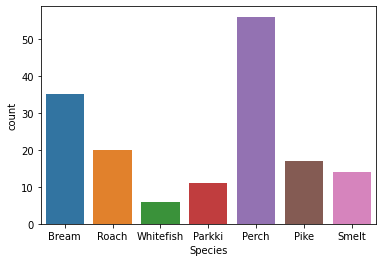

In [8]:
sns.countplot(x='Species', data=df)

In [9]:
X = df.drop('Species', axis=1)

In [10]:
y = df['Species']

In [11]:
X, y

(     Weight  Length1  Length2  Length3   Height   Width
 0     242.0     23.2     25.4     30.0  11.5200  4.0200
 1     290.0     24.0     26.3     31.2  12.4800  4.3056
 2     340.0     23.9     26.5     31.1  12.3778  4.6961
 3     363.0     26.3     29.0     33.5  12.7300  4.4555
 4     430.0     26.5     29.0     34.0  12.4440  5.1340
 ..      ...      ...      ...      ...      ...     ...
 154    12.2     11.5     12.2     13.4   2.0904  1.3936
 155    13.4     11.7     12.4     13.5   2.4300  1.2690
 156    12.2     12.1     13.0     13.8   2.2770  1.2558
 157    19.7     13.2     14.3     15.2   2.8728  2.0672
 158    19.9     13.8     15.0     16.2   2.9322  1.8792
 
 [159 rows x 6 columns], 0      Bream
 1      Bream
 2      Bream
 3      Bream
 4      Bream
        ...  
 154    Smelt
 155    Smelt
 156    Smelt
 157    Smelt
 158    Smelt
 Name: Species, Length: 159, dtype: object)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

In [13]:
 from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=6)
selector.fit(X_train, y_train)

SelectKBest(k=6)

In [14]:
selector.scores_

array([10.51666327, 26.83162347, 27.60998356, 29.52683251, 50.77729783,
       15.68150886])

In [15]:
cols = selector.get_support(indices=True)
cols

array([0, 1, 2, 3, 4, 5])

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y_map = {index:label for index,label in enumerate(encoder.classes_)}

In [18]:
y_map

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [24]:
log_model.score(X_test,y_test)

0.85

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred_rfc = model.predict(X_test)
model.score(X_test, y_test)

0.8

In [26]:
y_pred_log = log_model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
matrix = confusion_matrix(y_test, y_pred_log)

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

In [30]:
l = ['micro', 'macro', 'weighted']
scores = []
for i in l:
    scores.append(f1_score(y_test, y_pred_log, average=i))
scores

[0.85, 0.6857142857142857, 0.79]

In [31]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_log, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_log, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_log, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_log, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_log, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_log, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_log, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_log, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_log, average='weighted')))

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.67
Macro Recall: 0.71
Macro F1-score: 0.69

Weighted Precision: 0.75
Weighted Recall: 0.85
Weighted F1-score: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_log, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']))


Classification Report

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        11
     Class 1       1.00      1.00      1.00         2
     Class 2       0.67      1.00      0.80        12
     Class 3       1.00      1.00      1.00         4
     Class 4       0.00      0.00      0.00         3
     Class 5       1.00      1.00      1.00         5
     Class 6       0.00      0.00      0.00         3

    accuracy                           0.85        40
   macro avg       0.67      0.71      0.69        40
weighted avg       0.75      0.85      0.79        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import matplotlib.pyplot as plt

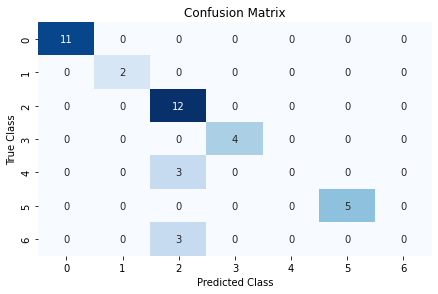

{0: 'Bream', 1: 'Parkki', 2: 'Perch', 3: 'Pike', 4: 'Roach', 5: 'Smelt', 6: 'Whitefish'}


In [34]:
sns.heatmap(matrix, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()
print(y_map)

In [35]:
# loading library
import pickle

In [36]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)